In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!pip uninstall tensorflow

Uninstalling tensorflow-2.2.0rc2:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.2.0rc2.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.2.0rc2


In [0]:
!pip install tensorflow==1.14.0

     |████████████████████████████████| 109.2MB 109kB/s 
     |████████████████████████████████| 491kB 57.6MB/s 
     |████████████████████████████████| 3.2MB 53.1MB/s 
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0


In [0]:
#TensorFlow and tf.keras
import tensorflow as tf
print("Version: ", tf.__version__)
from tensorflow import keras
import os
import cv2
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
print("Version: ", tf.__version__)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

Version:  1.14.0
Version:  1.14.0


In [0]:
%matplotlib inline

import glob
import matplotlib.image as mpimg
import imageio as im
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [0]:
!ls

gdrive	sample_data


In [0]:
%cd /content/gdrive/My\ Drive/

/content/gdrive/My Drive


In [0]:
!pwd

/content/gdrive/My Drive


In [0]:
%cd /content/gdrive/My\ Drive/landryt

/content/gdrive/My Drive/landryt


In [0]:
!pwd

/content/gdrive/My Drive/landryt


In [0]:
catagories = ['Aadhar','Pan','Electricitybill','Telephonebill','Propertytax','Khata']
data_dir="/content/gdrive/My Drive/landryt"

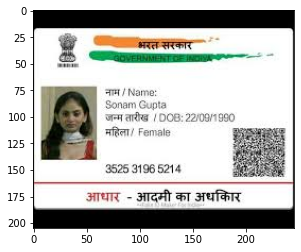

In [0]:
for c in catagories:
    path=os.path.join(data_dir,c)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img) )  # convert to array
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)) 
        plt.show()
        break
    break

In [0]:
print(img_array)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [0]:
IMG_SIZE=255

In [0]:
training_data=[]

def create_training_data():
    for category in catagories:
        path=os.path.join(data_dir, category)
        class_num=catagories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img) ) 
                #print(img_array) 
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                #print(img_array)
                training_data.append([new_array,class_num])
                #print(training_data)
                
            except Exception as e:
                pass
            
create_training_data()
            

In [0]:
img_array.shape

(205, 246, 3)

In [0]:
import random

random.shuffle(training_data)

In [0]:
X=[]
Y=[]

In [0]:
for f,l in training_data:
    X.append(f)
    Y.append(l)
X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,3)

In [0]:
X.shape

(84, 255, 255, 3)

[[[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  ...

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]]


 [[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255

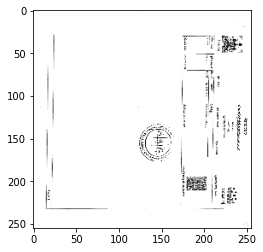

In [0]:
print(X)
plt.imshow(cv2.cvtColor(X[0],cv2.COLOR_BGR2RGB)) 

In [0]:
Y

[5,
 5,
 3,
 5,
 4,
 4,
 1,
 4,
 4,
 5,
 5,
 5,
 5,
 3,
 5,
 0,
 3,
 4,
 3,
 0,
 4,
 2,
 5,
 3,
 3,
 2,
 2,
 3,
 3,
 3,
 0,
 2,
 3,
 2,
 5,
 3,
 3,
 4,
 3,
 3,
 2,
 5,
 2,
 4,
 5,
 5,
 3,
 3,
 5,
 5,
 4,
 3,
 3,
 3,
 2,
 0,
 0,
 1,
 4,
 4,
 2,
 2,
 4,
 4,
 5,
 4,
 3,
 2,
 5,
 4,
 3,
 3,
 4,
 1,
 4,
 1,
 5,
 2,
 3,
 4,
 3,
 1,
 5,
 2]

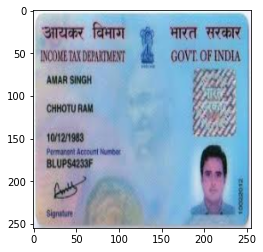

In [0]:
plt.figure()

plt.imshow(cv2.cvtColor(X[6],cv2.COLOR_BGR2RGB)) 

plt.show()

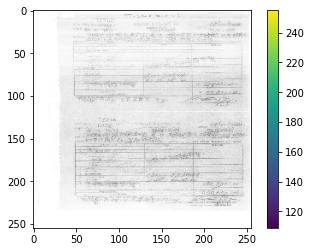

In [0]:
plt.figure()
plt.imshow(X[5])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
X = X / 255.0

In [0]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(255,255, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(6))
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
model.fit(X, Y,epochs=25)

Epoch 1/25
84/84 [==============================] - 13s 153ms/sample - loss: 0.2705 - acc: 0.9048
Epoch 2/25
84/84 [==============================] - 13s 154ms/sample - loss: 0.2116 - acc: 0.9286
Epoch 3/25
84/84 [==============================] - 13s 154ms/sample - loss: 0.2872 - acc: 0.9643
Epoch 4/25
84/84 [==============================] - 13s 154ms/sample - loss: 0.1775 - acc: 0.9405
Epoch 5/25
84/84 [==============================] - 13s 153ms/sample - loss: 0.0840 - acc: 0.9762
Epoch 6/25
84/84 [==============================] - 13s 154ms/sample - loss: 0.1933 - acc: 0.9762
Epoch 7/25
84/84 [==============================] - 13s 154ms/sample - loss: 0.1614 - acc: 0.9286
Epoch 8/25
84/84 [==============================] - 13s 153ms/sample - loss: 0.0934 - acc: 0.9881
Epoch 9/25
84/84 [==============================] - 13s 152ms/sample - loss: 0.2431 - acc: 0.8810
Epoch 10/25
84/84 [==============================] - 13s 152ms/sample - loss: 0.1309 - acc: 0.9643
Epoch 11/25
84/84 [

In [0]:
##saving the model
model.save('my_model.h5')
# Save the weights
model.save_weights('my_model_weights.h5')
# Restore the weights

model.load_weights('my_model_weights.h5')

loss,acc = model.evaluate(X, Y)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

84/84 [==============================] - 4s 42ms/sample - loss: 0.0012 - acc: 1.0000
Restored model, accuracy: 100.00%


In [0]:
import cv2

x=[]
#CATEGORIES = ["0", "1"]  # will use this to convert prediction num to string value

def prepare(filepath):
    IMG_SIZE = 255  # 50 in txt-based
    img_array = cv2.imread(filepath)  # read in the image, convert to grayscale
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))# resize image to match model's expected sizing
    plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB)) 
   
   
    plt.show()
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)  # return the image with shaping that TF wants.

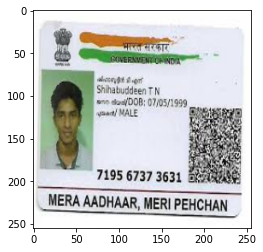

Actual:Aadhar

predicted: Aadhar


In [0]:
prediction = model.predict([prepare('/content/gdrive/My Drive/landryt/test/aadhar_or_pan_1.jpeg')])
print("Actual:Aadhar\n")
predicted_label = np.argmax(prediction)
print("predicted:",catagories[int(predicted_label)])